Pyber Analysis

The data shows that there is a direct correlation between city types, total fares, total rides, and total drivers.

Urban areas rule. Urban cities have the highest penetration of total fares, total rides, and total drivers compared to suburban and rural cities.

While rural areas have the lowest penetration of total fares, total rides, and total drivers, their average fares skew on the more expensive side of the spectrum. 

Suburban areas fell in the middle with regards to all metrics. Although suburban cities don’t have has many drivers as urban cities, someone who might consider being a driver with Pyber may want to choose to go to a suburban city where the average fares are higher than those in urban cities, but possibly risk less rider requests.


In [28]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data = "../data/city_data.csv"
ride_data = "../data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [29]:
# Combine the data into a single dataset
cityride_df = pd.merge(city_df, ride_df, on='city')
cityride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [30]:
# Obtain the x and y coordinates for each of the three city types
# x_axis = np.arange(0, 45, 5)

In [31]:
# Define all metrics

num_rides = cityride_df.groupby('city')['ride_id'].count()
avg_fare = cityride_df.groupby('city')['fare'].mean()
driver_count = cityride_df.groupby('city')['driver_count'].mean()
city_type = city_df.set_index('city')['type']

num_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [32]:
# Display new dataframe

city_total = pd.DataFrame({"Number of Rides" : num_rides,
                          "Average Fare" : avg_fare,
                          "Number of Drivers" : driver_count,
                          "City Type" : city_type})

city_total.head()

,Number of Rides,Average Fare,Number of Drivers,City Type
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


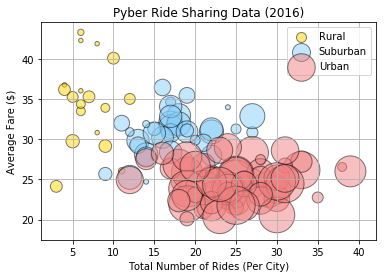

<Figure size 432x288 with 0 Axes>

In [33]:
# Create new dataframe for each city type

rural_df = city_total[city_total['City Type'] == 'Rural']
suburban_df = city_total[city_total['City Type'] == 'Suburban']
urban_df = city_total[city_total['City Type'] == 'Urban']

#rural_df
#suburban_df
#urban_df

rural_bubble = plt.scatter(rural_df['Number of Rides'], rural_df['Average Fare'], rural_df['Number of Drivers'] * 20, 
                           c="gold", label = "Rural", alpha = 0.5, edgecolor = "black", linewidths = 1)

suburban_bubble = plt.scatter(suburban_df['Number of Rides'], suburban_df['Average Fare'], suburban_df['Number of Drivers'] * 25, 
                           c="lightskyblue", label = "Suburban", alpha = 0.5, edgecolor = "black", linewidths = 1)

urban_bubble = plt.scatter(urban_df['Number of Rides'], urban_df['Average Fare'], urban_df['Number of Drivers'] * 20, 
                           c="lightcoral", label = "Urban", alpha = 0.5, edgecolor = "black", linewidths = 1)


plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.grid()
plt.show()
plt.savefig("Pyber Ride Sharing Data.png")


# below creates scatter plot chart for each city type - need to combine in one
# rural_df.plot(kind='scatter', x="Number of Rides", y="Average Fare", grid=True, figsize=(10,10))
# suburban_df.plot(kind='scatter', x="Number of Rides", y="Average Fare", grid=True, figsize=(10,10))
# urban_df.plot(kind='scatter', x="Number of Rides", y="Average Fare", grid=True, figsize=(10,10))


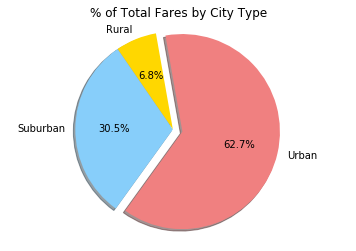

In [34]:
# Total Fares by City Type

# Calculate Type Percents
fare_city = cityride_df.groupby(["type"])["fare"].sum()
fare_city

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
explode = (0, 0, 0.1)
colors = ['gold', 'lightskyblue', 'lightcoral']

plt.pie(fare_city, labels = labels, 
        explode = explode,
        colors = colors,
        autopct = "%1.1f%%", 
        shadow = True, 
        startangle = 100)

plt.title("% of Total Fares by City Type")
plt.axis('equal')
plt.show

# Save Figure
plt.savefig("% of Total Fares by City Type.png")

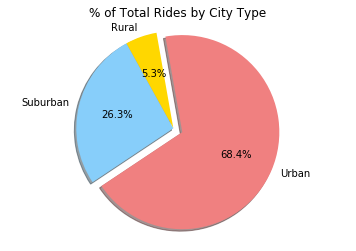

In [35]:
# Total Rides by City Type

# Calculate Ride Percents
ride_city = cityride_df.groupby(["type"])["ride_id"].count()
ride_city

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
explode = (0, 0, 0.1)
colors = ['gold', 'lightskyblue', 'lightcoral']

plt.pie(ride_city, labels = labels, 
        explode = explode,
        colors = colors,
        autopct = "%1.1f%%", 
        shadow = True, 
        startangle = 100)

plt.title("% of Total Rides by City Type")
plt.axis('equal')
plt.show

# Save Figure
plt.savefig("% of Total Rides by City Type.png")

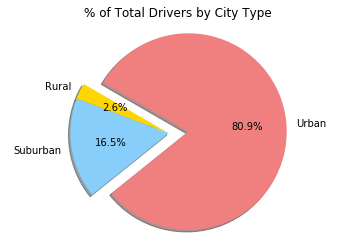

In [36]:
# Total Drivers by City Type

# Calculate Driver Percents
driver_city = city_df.groupby(["type"])["driver_count"].sum()
driver_city

# Build Pie Charts
labels = ["Rural","Suburban","Urban" ]
explode = (0, 0, 0.2)
colors = ['gold', 'lightskyblue', 'lightcoral']

plt.pie(driver_city, labels = labels, 
        explode = explode,
        colors = colors,
        autopct = "%1.1f%%", 
        shadow = True, 
        startangle = 150)

plt.title("% of Total Drivers by City Type")
plt.axis('equal')
plt.show

# Save Figure
plt.savefig("% of Total Drivers by City Type.png")